In [1]:
from sklearn.cluster import KMeans 

import pandas as pd 

from sklearn.preprocessing import MinMaxScaler 

from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv('healthcare_dataset.csv')

In [3]:
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


In [4]:
df.shape

(55500, 15)

In [5]:
df = df.drop('Name', axis=1) 

In [6]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1}) 

In [10]:
## Trasformando o tipo de sangue
unique_types = list(set(df['Blood Type'].tolist()))
mapping = {type_: idx for idx, type_ in enumerate(unique_types)}
print(f"Dicionário de mapeamento: {mapping}")
df['Blood Type'] = df['Blood Type'].map(mapping)

Dicionário de mapeamento: {'AB-': 0, 'O-': 1, 'AB+': 2, 'B+': 3, 'B-': 4, 'A-': 5, 'A+': 6, 'O+': 7}


In [12]:
## Trasformando o Medical Condition
unique_types = list(set(df['Medical Condition'].tolist()))
mapping = {type_: idx for idx, type_ in enumerate(unique_types)}
print(f"Dicionário de mapeamento: {mapping}")
df['Medical Condition'] = df['Medical Condition'].map(mapping)

Dicionário de mapeamento: {'Diabetes': 0, 'Cancer': 1, 'Hypertension': 2, 'Asthma': 3, 'Obesity': 4, 'Arthritis': 5}


In [14]:
## Trasformando o Hospital
unique_types = list(set(df['Hospital'].tolist()))
mapping = {type_: idx for idx, type_ in enumerate(unique_types)}
print(f"Dicionário de mapeamento: {mapping}")
df['Hospital'] = df['Hospital'].map(mapping)

Dicionário de mapeamento: {'Peterson, and Smith Munoz': 0, 'Jones Holmes Lane, and': 1, 'Beasley Sons and': 2, 'Alvarez Moss Smith, and': 3, 'and Carpenter Vasquez Leach,': 4, 'Oconnor and Sons': 5, 'Vargas and Patterson Cook,': 6, 'Camacho-Mckenzie': 7, 'Ballard, Baker and Cross': 8, 'Kim and Ellis, Bennett': 9, 'Ltd Moyer': 10, 'and Baldwin Walker, Campbell': 11, 'Hamilton PLC': 12, 'Kelly, Miller and Rosario': 13, 'and Roberts, Thomas Davis': 14, 'Holland-Adams': 15, 'Herrera Wall and Morgan,': 16, 'Foster LLC': 17, 'Mcgrath, Willis Roman and': 18, 'Dodson and Goodwin Green,': 19, 'Sons and Phillips': 20, 'Arnold-Aguirre': 21, 'Cox Gutierrez, and Hamilton': 22, 'Cardenas-Montgomery': 23, 'Douglas-Walter': 24, 'Carter-Baker': 25, 'Cardenas-Key': 26, 'Cochran Inc': 27, 'Padilla Estrada, and Savage': 28, 'Warner-Lopez': 29, 'Martin Pitts, Henderson and': 30, 'Adams Novak, and James': 31, 'Gates Johnson, and Velez': 32, 'Sons and Vang': 33, 'and Thompson Rodriguez, Murphy': 34, 'Warner-

In [16]:
## Trasformando o Doctor
unique_types = list(set(df['Doctor'].tolist()))
mapping = {type_: idx for idx, type_ in enumerate(unique_types)}
print(f"Dicionário de mapeamento: {mapping}")
df['Doctor'] = df['Doctor'].map(mapping)

Dicionário de mapeamento: {'David Pennington': 0, 'Joel Garcia': 1, 'Susan Anderson': 2, 'Travis Sweeney MD': 3, 'Wayne Brown': 4, 'Scott Harmon': 5, 'Mrs. Amanda Hunter MD': 6, 'Christine Morgan': 7, 'Ann Castro': 8, 'Dawn Hawkins': 9, 'Kenneth Brown MD': 10, 'Melissa Terry': 11, 'Tabitha Baker': 12, 'Adam Mitchell': 13, 'Anthony Morris': 14, 'Eric Boyd': 15, 'Ryan Wallace': 16, 'Angel Ford': 17, 'Alisha Hansen': 18, 'Joshua Perkins': 19, 'Leon Gomez': 20, 'Ricardo Bishop': 21, 'Randy Martinez': 22, 'Juan Cantu MD': 23, 'Stephen Schaefer': 24, 'John May': 25, 'Brian Morse': 26, 'Mr. Antonio Santos': 27, 'Christina Green': 28, 'Norman Watson': 29, 'Michael Henson': 30, 'Carlos Torres': 31, 'Christopher Blair': 32, 'Shelia Barrett': 33, 'Jason Gonzalez': 34, 'Erin Jones': 35, 'Bradley Walker': 36, 'Jessica Stevens': 37, 'Guy Blackwell': 38, 'Scott Sims': 39, 'Sandra Lopez': 40, 'Luis Mcclain': 41, 'Samuel Hurst': 42, 'Brandi Gregory': 43, 'Stacey Thomas': 44, 'Christian Owens': 45, 'Jef

In [17]:
## Trasformando o Insurance Provider
unique_types = list(set(df['Insurance Provider'].tolist()))
mapping = {type_: idx for idx, type_ in enumerate(unique_types)}
print(f"Dicionário de mapeamento: {mapping}")
df['Insurance Provider'] = df['Insurance Provider'].map(mapping)

Dicionário de mapeamento: {'Blue Cross': 0, 'UnitedHealthcare': 1, 'Cigna': 2, 'Aetna': 3, 'Medicare': 4}


In [19]:
## Trasformando o Admission Type
unique_types = list(set(df['Admission Type'].tolist()))
mapping = {type_: idx for idx, type_ in enumerate(unique_types)}
print(f"Dicionário de mapeamento: {mapping}")
df['Admission Type'] = df['Admission Type'].map(mapping)

Dicionário de mapeamento: {'Urgent': 0, 'Emergency': 1, 'Elective': 2}


In [20]:
## Trasformando o Medication
unique_types = list(set(df['Medication'].tolist()))
mapping = {type_: idx for idx, type_ in enumerate(unique_types)}
print(f"Dicionário de mapeamento: {mapping}")
df['Medication'] = df['Medication'].map(mapping)

Dicionário de mapeamento: {'Penicillin': 0, 'Paracetamol': 1, 'Aspirin': 2, 'Lipitor': 3, 'Ibuprofen': 4}


In [21]:
## Trasformando o Test Results
unique_types = list(set(df['Test Results'].tolist()))
mapping = {type_: idx for idx, type_ in enumerate(unique_types)}
print(f"Dicionário de mapeamento: {mapping}")
df['Test Results'] = df['Test Results'].map(mapping)

Dicionário de mapeamento: {'Normal': 0, 'Abnormal': 1, 'Inconclusive': 2}


In [22]:
df.head(10)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,30,0,4,1,2024-01-31,22687,39159,0,18856.281306,328,0,2024-02-02,1,0
1,62,0,6,4,2019-08-20,10171,11929,4,33643.327287,265,1,2019-08-26,4,2
2,76,1,5,4,2022-09-22,31409,38902,3,27955.096079,205,1,2022-10-07,2,0
3,28,1,7,0,2020-11-18,36859,882,4,37909.782410,450,2,2020-12-18,4,1
4,43,1,2,1,2022-09-19,4980,26236,3,14238.317814,458,0,2022-10-09,0,1
5,36,0,6,3,2023-12-20,29388,27818,1,48145.110951,389,0,2023-12-24,4,0
6,21,1,0,0,2020-11-03,12183,4211,4,19580.872345,389,1,2020-11-15,1,2
7,20,1,6,1,2021-12-28,21725,34830,2,45820.462722,277,1,2022-01-07,1,2
8,82,0,2,3,2020-07-01,21281,34217,2,50119.222792,316,2,2020-07-14,2,1
9,58,1,0,1,2021-05-23,15425,21755,1,19784.631062,249,2,2021-06-22,1,2


In [23]:
df.describe() 

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results
count,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000,55500.000000
mean,51.539459,0.499568,3.502378,2.499748,20130.832486,20045.457982,1.999604,25539.316097,301.134829,1.001423,2.003369,0.997099
std,19.602454,0.500004,2.290025,1.710939,11681.799974,11471.803665,1.413525,14211.454431,115.243069,0.819048,1.414165,0.815096
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2008.492140,101.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,2.000000,1.000000,10001.750000,10179.750000,1.000000,13241.224652,202.000000,0.000000,1.000000,0.000000
50%,52.000000,0.000000,4.000000,2.000000,20145.000000,20017.500000,2.000000,25538.069376,302.000000,1.000000,2.000000,1.000000
75%,68.000000,1.000000,5.000000,4.000000,30240.250000,29964.000000,3.000000,37820.508436,401.000000,2.000000,3.000000,2.000000
max,89.000000,1.000000,7.000000,5.000000,40340.000000,39875.000000,4.000000,52764.276736,500.000000,2.000000,4.000000,2.000000


Text(0, 0.5, 'Medical Condition')

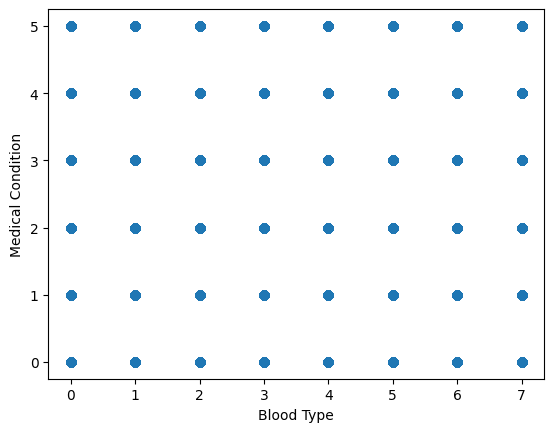

In [25]:
# Gráfico de  Dispersão Blood Type x Medical Condition

plt.scatter(df['Blood Type'],df['Medical Condition']) 

plt.xlabel("Blood Type") 

plt.ylabel('Medical Condition') 

Text(0, 0.5, 'Medical Condition')

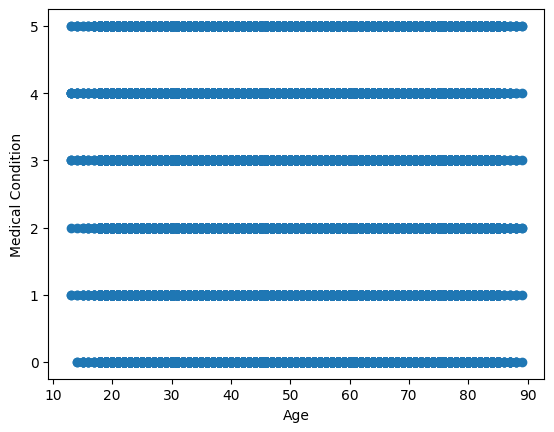

In [26]:
# Gráfico de  Dispersão Age x Medical Condition

plt.scatter(df['Age'],df['Medical Condition']) 

plt.xlabel("Age") 

plt.ylabel('Medical Condition') 

Text(0, 0.5, 'Gender')

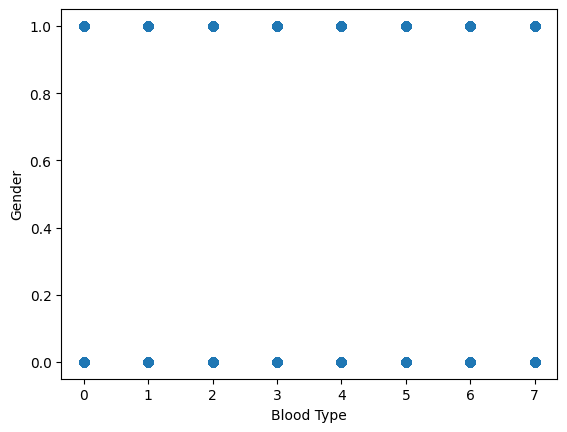

In [27]:
# Gráfico de  Dispersão Blood Type x Gender

plt.scatter(df['Blood Type'],df['Gender']) 

plt.xlabel("Blood Type") 

plt.ylabel('Gender') 

Text(0, 0.5, 'Billing Amount')

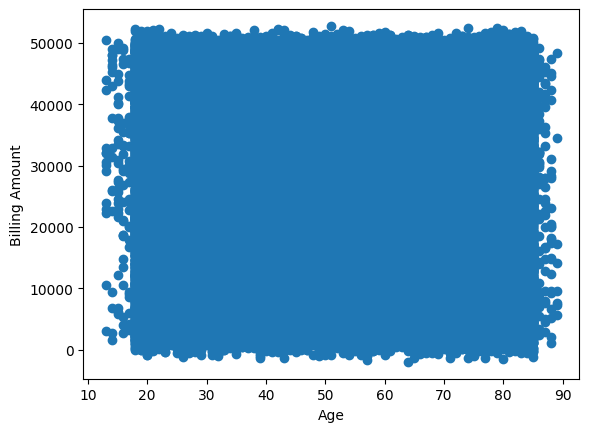

In [35]:
# Gráfico de  Dispersão Billing Amount x Medical Condition

plt.scatter(df['Age'], df['Billing Amount']) 

plt.xlabel('Age') 

plt.ylabel("Billing Amount") 
